Observations:
*The Equator is the line of 0 degrees latitude
1) It is perceived a correlation between latitude and temperature. My random sample of 900+ cities from all around the world show a trend, overall speaking, of hotter temperatures when the latitude is closer to 0 (Equator line).
2) The scatter plot showcasing the relationship between humidity and latitude does NOT visually display a strong correlation between the variables. Although it tends to be highly humidy in cities on the Equator line, this could also be noticed in cities farther from 0 latitude.
3) It seems that latitude and cloudiness have a poor correlation. The same was observed between latitude and wind speed. The datapoints are very scattered across the final graphics. 

In [27]:
#Importing Dependencies
! pip install citipy
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy as cp
import openweathermapy.core as owm
import time
import random
import json
import requests
from config import api_key




You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Basic geography to keep in mind: What are geographic coordinate systems?
http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm
Latitude and longitude values are traditionally measured either in decimal degrees or in degrees, minutes, and seconds (DMS). Latitude values are measured relative to the equator and range from -90° at the South Pole to +90° at the North Pole. Longitude values are measured relative to the prime meridian. They range from -180° when traveling west to 180° when traveling east. If the prime meridian is at Greenwich, then Australia, which is south of the equator and east of Greenwich, has positive longitude values and negative latitude values.

In [28]:
#Selecting randomly, based on latitude and longitude, at least 500 cities with citipy
#https://stackoverflow.com/questions/19668463/generating-multiple-random-x-y-coordinates-excluding-duplicates

#city = citipy.nearest_city(lat, lng)
#city.city_name     
#city.country_code
#500+ sample coordinates (lat, long)

coordinates = set()

for x in range(-90,90):
    for y in range(-180,180):
        coordinates.add((x,y))

#This code created a dictionary of all possible sets of latitudes - ranging from -90 to 90 - and longitudes - ranging from -180 to 180
#This will be my added to my cities list and later on I will randomly select a sample of these cities.
#print(coordinates)

cities = []

for coordinates_pair in coordinates:
    x,y = coordinates_pair
    cities.append(cp.nearest_city(x,y))

#just checking the .city_name and .country_code functions
print(cities[499].city_name)
print(cities[499].country_code)


roma
au


In [29]:
#https://stackoverflow.com/questions/22412258/get-the-first-element-of-each-tuple-in-a-list-in-python

# I will need this info for my dataframe 

lat = [x[0] for x in coordinates]
lng = [y[1] for y in coordinates]



In [30]:
#curious to know the number of cities from my "cities". 
print(len(cities))



64800


In [31]:
cities[0]

In [32]:
#Citipy returns a citipy object (see abobe in 104) that does not let us promtply identify the information of the city in question
# I need an eventudal dataframe for easy visualization of each city's information. A *for loop* will help out then I can append
#each city name and respective couunty, latitude and longitude to their respective lists and then, create a dataframe
#from my city dictionary.

city_name = []
country = []

for city in cities:
    city_name.append(city.city_name)
    country.append(city.country_code)

city_dict = {
    "city": city_name,
    "country": country,
    "latitude":lat,
    "longitude":lng
}

city_df = pd.DataFrame(city_dict)
city_df.head()


    
    

,city,country,latitude,longitude
0,saint-philippe,re,-35,61
1,saint george,bm,35,-61
2,lavrentiya,ru,72,-169
3,esperance,au,-49,126
4,port hardy,ca,49,-128


In [33]:
#I want a sample of *at least* 500 cities. My DF has 64800 cities. I understand some different 
#countries may have cities with the same name, but (of course) different latitude and longitude. 
#However, for this exercise, I chose to keep cities with unique names to narrow down my DF. 
#Then, I will get a random sample of 1000 and drop cities with non populated information. 
#Finally, I will perform an API call based on (all unique) city names.

city_unique_df = city_df.drop_duplicates(subset="city", keep='first')
city_unique_df.head()
len(city_unique_df)




7957

In [34]:
#Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
city_sample_df = city_unique_df.sample(n=1000, frac=None, replace=False, weights=None, random_state=None, axis=None)
city_sample_df.head()


,city,country,latitude,longitude
1060,saint-leu,re,-23,53
5767,andevoranto,mg,-19,50
1755,tual,id,-8,136
21109,acatlan,mx,18,-98
24640,mopipi,bw,-21,25


In [35]:
#Don't forget to reindex your sample table, so the index column will be in order again
city_sample_reindex = city_sample_df.reset_index(drop=True)

city_sample_reindex.head()



,city,country,latitude,longitude
0,saint-leu,re,-23,53
1,andevoranto,mg,-19,50
2,tual,id,-8,136
3,acatlan,mx,18,-98
4,mopipi,bw,-21,25


In [ ]:
#* Perform a weather check on each of the cities using a series of successive API calls. 
#* Include a print log of each city as it's being processed with the city number, city name, and requested URL.
#* Save both a CSV of all data retrieved and png images for each scatter plot.

In [ ]:
#grab temp for each city in city_sample_reindex
#API call:
#api.openweathermap.org/data/2.5/weather?q={city name}


# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
count = 0

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

city_sample_reindex['temperature'] = ""
city_sample_reindex['humidity'] = ""
city_sample_reindex['cloudiness'] = ""
city_sample_reindex["wind_speed"] = ""


for index,row in city_sample_reindex.iterrows():
    city = row['city']
    final_url = query_url + city.replace(" ", "+")
    #.replace will concatenate the multi space between a city name, for example, sao geraldo do araguaia. Otherwise, the url 
    #would break.
    
    weather_response = requests.get(final_url).json()

    try:
        city_sample_reindex.set_value(index, "temperature", weather_response['main']['temp'])
        city_sample_reindex.set_value(index, "humidity", weather_response['main']['humidity'])
        city_sample_reindex.set_value(index, "cloudiness", weather_response['clouds']['all'])
        city_sample_reindex.set_value(index, "wind_speed", weather_response['wind']['speed'])
      
    
    except:
        
        print(f"No data for this city: {row['city']}")
    
    print(f"City Name: {row['city']}" )
    print(f"URL: {final_url}")
        

# After getting errors I verified with try/except if all cities had info populated. I found out that some had not and their 
#url would give a 404 code.
 

C:\Users\Pati_\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Pati_\Anaconda3\lib\site-packages\ipykernel\__main__.py:30: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Pati_\Anaconda3\lib\site-packages\ipykernel\__main__.py:31: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Pati_\Anaconda3\lib\site-packages\ipykernel\__main__.py:32: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


City Name: saint-leu
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=saint-leu
No data for this city: andevoranto
City Name: andevoranto
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=andevoranto
City Name: tual
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=tual
No data for this city: acatlan
City Name: acatlan
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=acatlan
City Name: mopipi
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=mopipi
City Name: saskatoon
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=saskatoon
City Name: megion
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=megi

City Name: shaoguan
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=shaoguan
City Name: amarpur
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=amarpur
City Name: sabla
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=sabla
City Name: khilok
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=khilok
City Name: spornoye
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=spornoye
City Name: alofi
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=alofi
City Name: mau
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=mau
No data for this city: chaochou
City Name: chaochou
URL: http://api.openweathermap.

City Name: champerico
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=champerico
City Name: verkhoturye
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=verkhoturye
City Name: henties bay
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=henties+bay
City Name: bellary
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=bellary
City Name: jaisalmer
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=jaisalmer
City Name: sao jose da coroa grande
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=sao+jose+da+coroa+grande
City Name: greymouth
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=greymouth
No da

City Name: koeru
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=koeru
City Name: bogalusa
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=bogalusa
City Name: ovalle
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=ovalle
City Name: riverton
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=riverton
City Name: nehalim
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=nehalim
City Name: verkhovazhye
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=verkhovazhye
City Name: tekeli
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=tekeli
No data for this city: tatawin
City Name: tatawin
URL: http://a

In [ ]:
#I need to find the cities with empty data, fill empty spaces and remove those rows. I chose to fill them with NaN and use .dropna
#function to remove those rows.

city_sample_reindex.head(15)

In [ ]:
import numpy as np
city_sample_reindex.replace('', np.nan, inplace=True)


In [ ]:
city_sample_reindex.head(15)

In [ ]:
city_sample = city_sample_reindex.dropna()
city_sample.head(15)


In [ ]:
city_sample_final = city_sample.reset_index(drop=True)
city_sample_final.head(15)

In [ ]:
#We ended up with a sample of 919. I'm happy with it!
print(len(city_sample_final))

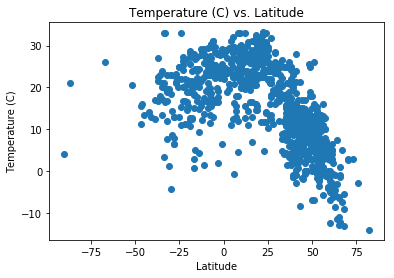

In [18]:
#Build a scatter plot to showcase the relationship:

#* Temperature (F) vs. Latitude

plt.scatter(city_sample_final['latitude'],city_sample_final['temperature'])
plt.title(f"Temperature (C) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.savefig("Temperature.png")
plt.show()

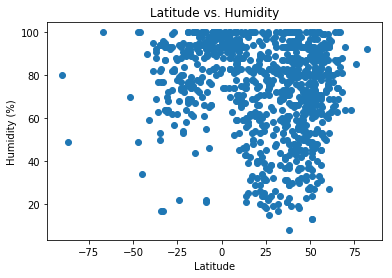

In [25]:
#* Humidity (%) vs. Latitude

plt.scatter(city_sample_final['latitude'],city_sample_final['humidity'])
plt.title(f"Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Humidity.png")
plt.show()

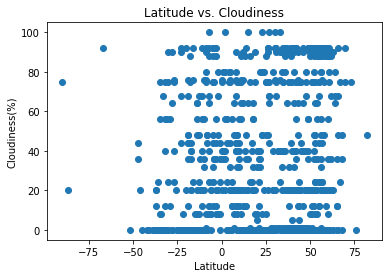

In [23]:
#* Cloudiness (%) vs. Latitude

plt.scatter(city_sample_final['latitude'],city_sample_final['cloudiness'])
plt.title(f"Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.savefig("Cloudiness.png")
plt.show()

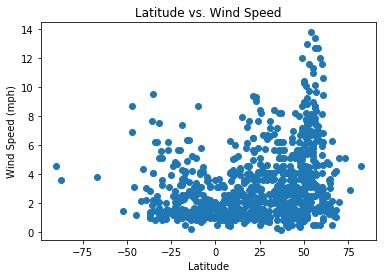

In [24]:
#* Wind Speed (mph) vs. Latitude

plt.scatter(city_sample_final['latitude'],city_sample_final['wind_speed'])
plt.title(f"Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Wind Speed.png")
plt.show()




In [22]:
#DataFrame to CSV
city_sample_final.to_csv("cities_geoinfo.csv", index=False)
df = pd.read_csv("cities_geoinfo.csv")
df.head()

,city,country,latitude,longitude,temperature,humidity,cloudiness,wind_speed
0,nehalim,il,32,35,18.57,82.0,40.0,2.10
1,kankakee,us,41,-88,7.00,52.0,1.0,4.10
2,madona,lv,57,26,6.39,58.0,0.0,6.28
3,kaseda,jp,30,130,24.00,47.0,20.0,4.10
4,sao miguel,br,-5,-34,16.59,99.0,48.0,1.18
